In [158]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
df_test = pd.read_csv('./anomaly_data.csv')
df_test[' timestamp'] = pd.to_datetime(df_test[' timestamp'])

In [160]:
df_test

,cpu_used,memory_used,timestamp
0,44.257902,499971.901834,2023-12-04 22:00:00+00:00
1,57.995132,499804.705626,2023-12-04 22:05:00+00:00
2,57.052537,499968.716084,2023-12-04 22:10:00+00:00
3,46.925357,500108.595365,2023-12-04 22:15:00+00:00
4,52.596490,500080.930637,2023-12-04 22:20:00+00:00
...,...,...,...
995,50.948086,500095.181513,2023-12-08 08:55:00+00:00
996,48.004218,500084.655784,2023-12-08 09:00:00+00:00
997,56.570113,499918.757240,2023-12-08 09:05:00+00:00
998,47.978614,500065.941323,2023-12-08 09:10:00+00:00


In [161]:
cpu_used = df_test[['cpu_used', ' timestamp']]
memory_used = df_test[[' memory_used', ' timestamp']]

In [162]:
def create_lag(df, col, num_lags=1):
    for i in range(1, num_lags+1):
        df['lag_{}'.format(i)] = df[col].shift(i)
      
    df = df.dropna()
    return df

In [163]:
cpu_used = create_lag(cpu_used, 'cpu_used', 2)
memory_used = create_lag(memory_used, ' memory_used', 2)

In [164]:
X_cpu = cpu_used[['cpu_used', 'lag_1', 'lag_2']]
X_memory = memory_used[[' memory_used', 'lag_1', 'lag_2']]

In [165]:
X_cpu['cpu_used'] = (X_cpu['cpu_used']/100).astype(float)
X_cpu['lag_1'] = (X_cpu['lag_1']/100).astype(float)
X_cpu['lag_2'] = (X_cpu['lag_2']/100).astype(float)

X_memory[' memory_used'] = (X_memory[' memory_used']/1000000).astype(float)
X_memory['lag_1'] = (X_memory['lag_1']/1000000).astype(float)
X_memory['lag_2'] = (X_memory['lag_2']/1000000).astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_19480\195105115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cpu['cpu_used'] = (X_cpu['cpu_used']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_19480\195105115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cpu['lag_1'] = (X_cpu['lag_1']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_19480\195105115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [166]:
X_memory

,memory_used,lag_1,lag_2
2,0.499969,0.499805,0.499972
3,0.500109,0.499969,0.499805
4,0.500081,0.500109,0.499969
5,0.499981,0.500081,0.500109
6,0.499825,0.499981,0.500081
...,...,...,...
995,0.500095,0.499886,0.499989
996,0.500085,0.500095,0.499886
997,0.499919,0.500085,0.500095
998,0.500066,0.499919,0.500085


In [167]:
model = tf.keras.models.load_model('./model_custom_threshold.h5')

In [168]:
cpu_pred = model.predict(X_cpu.to_numpy())
memory_pred = model.predict(X_memory.to_numpy())

32/32 [==============================] - 0s 3ms/step


In [175]:
cpu_used['prediction'] = cpu_pred
cpu_used['prediction'] = cpu_used['prediction'].apply(lambda x: 1 if x > 0.46 else 0)

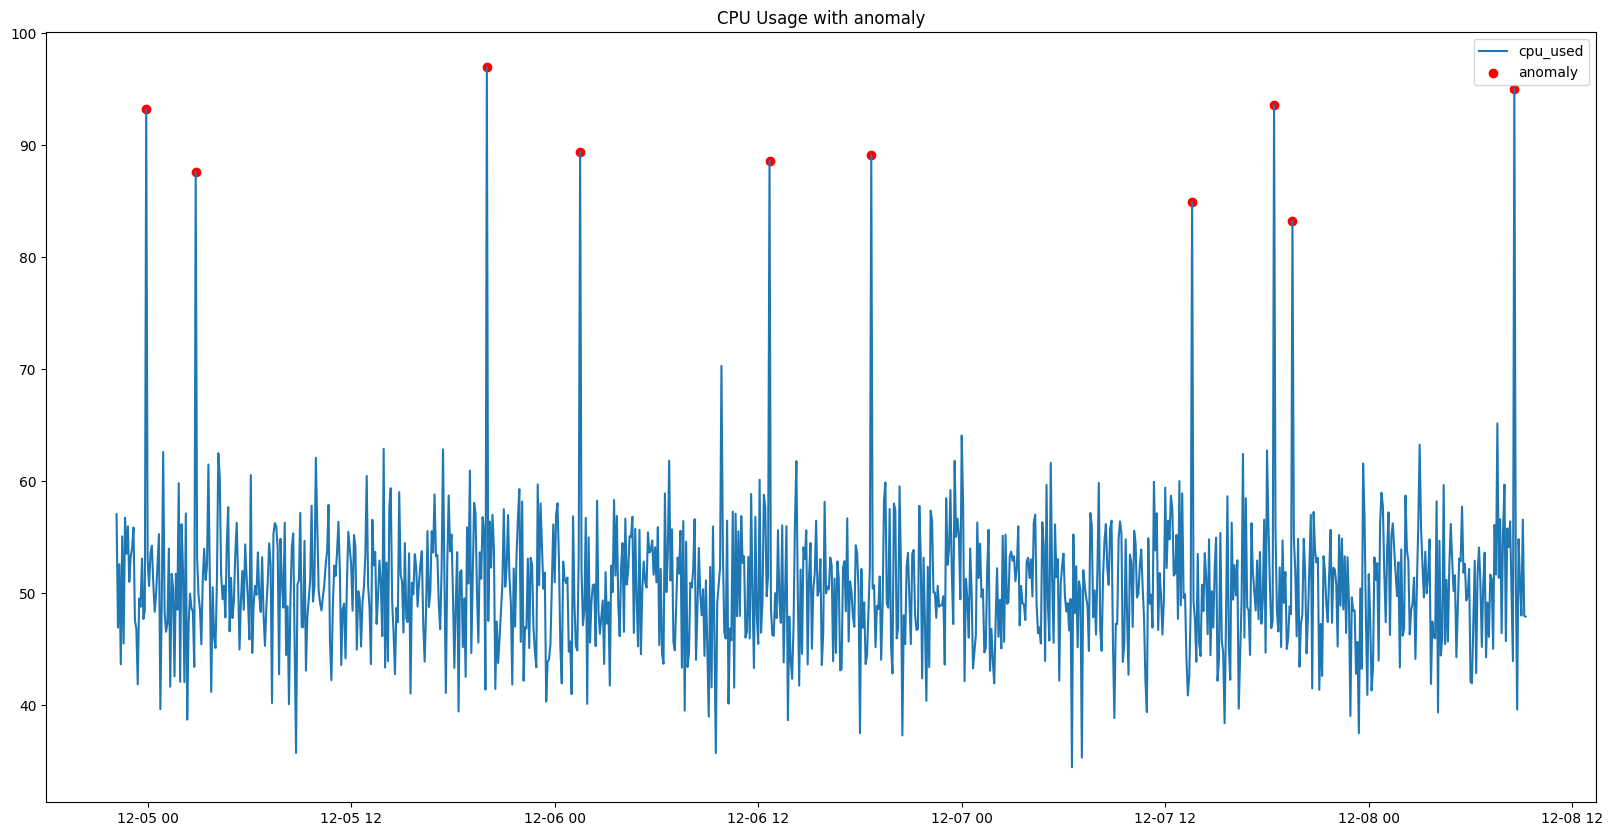

In [176]:
plt.figure(figsize=(20,10))
plt.plot(cpu_used[' timestamp'], cpu_used['cpu_used'], label='cpu_used')
plt.scatter(cpu_used[cpu_used['prediction'] == 1][' timestamp'], cpu_used[cpu_used['prediction'] == 1]['cpu_used'], color='red', label='anomaly')
plt.legend()
plt.title('CPU Usage with anomaly')
plt.show()


In [115]:
memory_used['prediction'] = memory_pred
memory_used['prediction'] = memory_used['prediction'].apply(lambda x: 1 if x > 0.5 else 0)

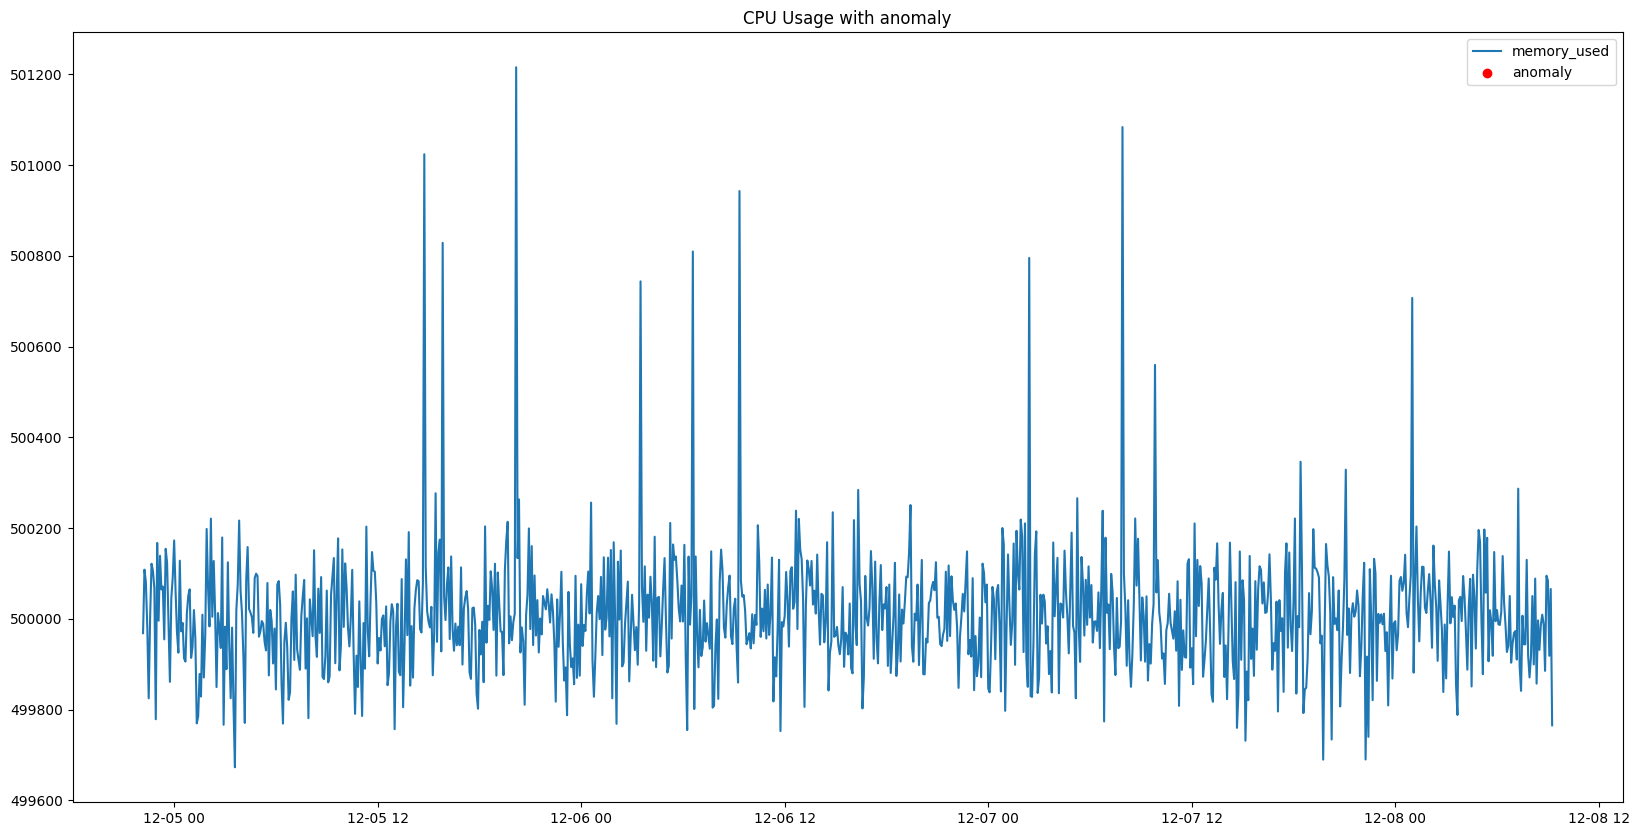

In [116]:
plt.figure(figsize=(20,10))
plt.plot(memory_used[' timestamp'], memory_used[' memory_used'], label='memory_used')
plt.scatter(memory_used[memory_used['prediction'] == 1][' timestamp'], memory_used[memory_used['prediction'] == 1][' memory_used'], color='red', label='anomaly')
plt.legend()
plt.title('CPU Usage with anomaly')
plt.show()
